Calculate radiative feedbacks from fully-coupled simulations as in
$\lambda = (N - F)/T$

In [15]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import nctoolkit as nct

import xarray
import proplot as pplt

In [2]:
my_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2'

f_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/fixed_SSTs'
e_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/SOM'
b_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/'
cesm2_dir = '/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/fixed_SSTs'

In [3]:
# mask = xarray.open_dataset('/tdat/mdvorak/CMIP6/Pliocene/domain.lnd.fv0.9_1.25_gx1v6plioenh.190801.nc')
# mask['ni'] = mask.mask.xc[0,:]
# mask['nj'] = mask.mask.yc[:,0]

# mask = mask.rename(ni='lon',nj='lat')

mask = xarray.open_dataset('/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM1.2/SOM/Pliocene_mask.nc')

In [4]:
# get forcing from fixed SST simulations

f_pi = xarray.open_dataset('%s/f.e21.F1850.f09_f09.CMIP6-piControl.new.284.7.cam.h0.allvars.06-33yrs.nc' %(f_dir))
f_plio = xarray.open_dataset('%s/f.e21.F1850.f09_f09.PMIP4-midPliocene.new.400.0.cam.h0.allvars.06-30yrs.nc' %(f_dir))
f_CO2 = xarray.open_dataset('%s/f.e21.F1850.f09_f09.CMIP6-piControl.new.569.4.cam.h0.allvars.06-33yrs.nc' %(f_dir))
f_400 = xarray.open_dataset('%s/f.e21.F1850.f09_f09.CMIP6-piControl.new.400.cam.h0.TEMP.ICE.FORCING.SHOW.06-33yrs.nc' %(cesm2_dir))
f_plio_280 = xarray.open_dataset('%s/f.e21.F1850.f09_f09.PMIP4-midPliocene.new.284.7.cam.h0.allvars.06-35yrs.nc' %(f_dir))

f_weights = np.cos(np.deg2rad(f_CO2.lat))

In [5]:
# get forcing and atmospheric temperature fields from fixed SST simulations

b_pi_FSNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.FSNT.190001-200012.nc' %(b_dir))
b_pi_FLNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.FLNT.190001-200012.nc' %(b_dir))
b_pi_FSNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.FSNTC.190001-200012.nc' %(b_dir))
b_pi_FLNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.FLNTC.190001-200012.nc' %(b_dir))
b_pi_TS = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.TS.190001-200012.nc' %(b_dir))

b_plio_FLNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.FLNT.115101-120012.nc' %(b_dir)) # last 50 years
b_plio_FSNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.FSNT.115101-120012.nc' %(b_dir))
b_plio_FLNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.FLNTC.115101-120012.nc' %(b_dir)) # last 50 years
b_plio_FSNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.FSNTC.115101-120012.nc' %(b_dir))
b_plio_TS = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.TS.115101-120012.nc' %(b_dir)) # last 50 years

b_plio_pi_FLNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.FLNT.035101-040512.nc' %(b_dir)) # last 50 years
b_plio_pi_FSNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.FSNT.035101-040512.nc' %(b_dir))
b_plio_pi_FLNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.FLNTC.035101-040512.nc' %(b_dir)) # last 50 years
b_plio_pi_FSNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.FSNTC.035101-040512.nc' %(b_dir))
b_plio_pi_TS = xarray.open_dataset('%s/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.TS.035101-040512.nc' %(b_dir)) # last 50 years

b_co2_FLNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.FLNT.812-902yrs.nc' %(b_dir))
b_co2_FSNT = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.FSNT.812-902yrs.nc' %(b_dir)) 
b_co2_FLNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.FLNTC.812-902yrs.nc' %(b_dir))
b_co2_FSNTC = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.FSNTC.812-902yrs.nc' %(b_dir)) 
b_co2_TS = xarray.open_dataset('%s/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.TS.812-902yrs.nc' %(b_dir))

b_weights = np.cos(np.deg2rad(b_pi_FSNT.lat))

In [6]:
def time_weights(ds):
    month_length = ds.time.dt.days_in_month
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xarray.ALL_DIMS), 1.0)
    
    return wgts

In [7]:
def lat_weights(ds):
    clat = np.cos(np.deg2rad(ds.lat)) 
    return clat / np.sum(clat) 

In [8]:
def calc_temp(sim, pi):
    return (sim.TS).weighted(time_weights(sim)).mean('time').weighted(lat_weights(f_weights)).mean(("lat","lon")) - pi.TS.weighted(time_weights(pi)).mean('time').weighted(lat_weights(f_weights)).mean(("lat","lon"))

In [9]:
b_temp = [b_plio_TS, b_plio_pi_TS, b_co2_TS]
f_temp = [f_plio, f_plio_280, f_400]

TS = [calc_temp(sim, b_pi_TS) for sim in b_temp]
T_surf = [calc_temp(sim, f_pi) for sim in f_temp]

In [18]:
print(TS)
print(T_surf)

[<xarray.DataArray 'TS' ()>
array(5.10408248), <xarray.DataArray 'TS' ()>
array(2.85107765), <xarray.DataArray 'TS' ()>
array(2.00941925)]
[<xarray.DataArray 'TS' ()>
array(0.4264251), <xarray.DataArray 'TS' ()>
array(0.30771675), <xarray.DataArray 'TS' ()>
array(0.11203445)]


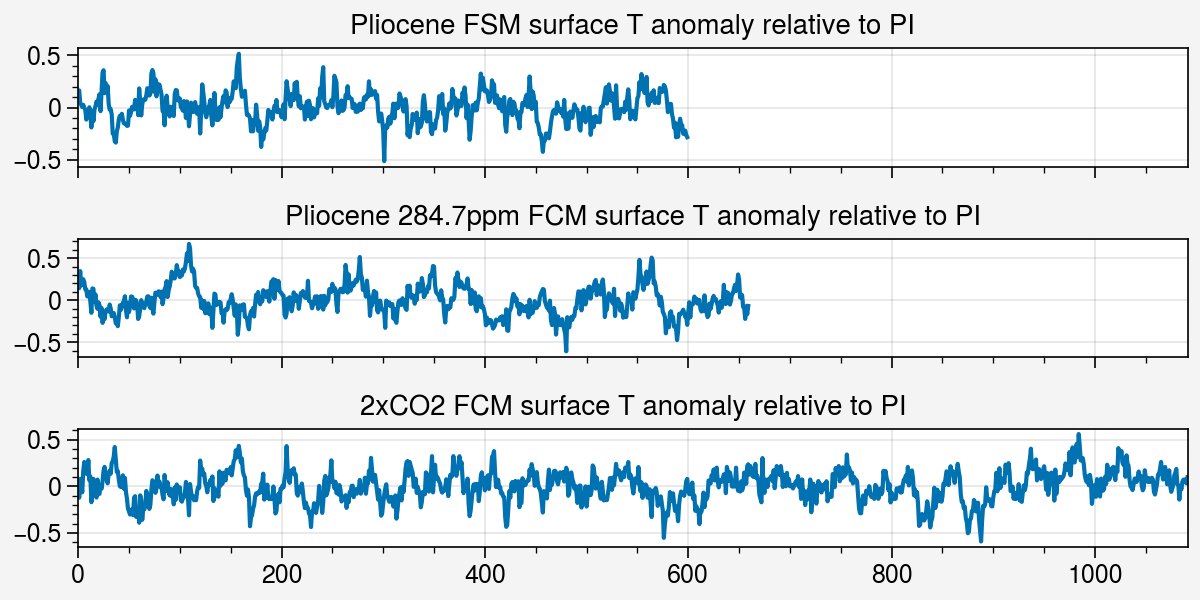

In [39]:
# Plot surface temperature trends

fig, ax = pplt.subplots(ncols=1,nrows=3, figsize=(6,3))
T_plio = ((b_plio_TS.TS - b_pi_TS.TS.mean('time'))).weighted(b_weights).mean(("lat","lon"))
T_plio_pi = (b_plio_pi_TS.TS - b_pi_TS.TS.mean('time')).weighted(b_weights).mean(("lat","lon"))
T_co2 = ((b_co2_TS.TS - b_pi_TS.TS.mean('time'))).weighted(b_weights).mean(("lat","lon"))

T_plio = T_plio.groupby('time.month') - T_plio.groupby('time.month').mean('time')
T_plio_pi = T_plio_pi.groupby('time.month') - T_plio_pi.groupby('time.month').mean('time')
T_co2 = T_co2.groupby('time.month') - T_co2.groupby('time.month').mean('time')

ax[0].plot(np.asarray(T_plio))
ax[0].set_title('Pliocene FSM surface T anomaly relative to PI')
ax[1].plot(np.asarray(T_plio_pi))
ax[1].set_title('Pliocene 284.7ppm FCM surface T anomaly relative to PI')
ax[2].plot(np.asarray(T_co2))
ax[2].set_title('2xCO2 FCM surface T anomaly relative to PI');

In [10]:
def calculate_clearsky_SW(b_ds, b_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_SW = ((b_ds.FSNTC.weighted(time_weights(b_ds)).mean('time') - b_ds_pi.FSNTC.weighted(time_weights(b_ds_pi)).mean('time')) - 
                    ((f_ds.FSNTC.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FSNTC.weighted(time_weights(f_ds_pi)).mean('time')) + 
                     1.01 * delta_T))
    

    return N_minus_F_SW

def calculate_clearsky_LW(b_ds, b_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_LW = (-(b_ds.FLNTC.weighted(time_weights(b_ds)).mean('time') - b_ds_pi.FLNTC.weighted(time_weights(b_ds_pi)).mean('time')) - 
                    ((-(f_ds.FLNTC.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FLNTC.weighted(time_weights(f_ds_pi)).mean('time')))
                   + 1.01 * delta_T))
    
    return N_minus_F_LW

def calculate_allsky_SW(b_ds, b_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_SW = ((b_ds.FSNT.weighted(time_weights(b_ds)).mean('time') - b_ds_pi.FSNT.weighted(time_weights(b_ds_pi)).mean('time')) - 
                    ((f_ds.FSNT.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FSNT.weighted(time_weights(f_ds_pi)).mean('time'))
                   + 1.01 * delta_T))
    

    return N_minus_F_SW

def calculate_allsky_LW(b_ds, b_ds_pi, f_ds, f_ds_pi, delta_T):
    
    N_minus_F_LW = (-(b_ds.FLNT.weighted(time_weights(b_ds)).mean('time') - b_ds_pi.FLNT.weighted(time_weights(b_ds_pi)).mean('time')) - 
                    ((-(f_ds.FLNT.weighted(time_weights(f_ds)).mean('time') - f_ds_pi.FLNT.weighted(time_weights(f_ds_pi)).mean('time')))
                    + 1.01 * delta_T))
    
    return N_minus_F_LW

In [11]:
FSNTC = [b_plio_FSNTC, b_plio_pi_FSNTC, b_co2_FSNTC]
FLNTC = [b_plio_FLNTC, b_plio_pi_FLNTC, b_co2_FLNTC]

FSNT = [b_plio_FSNT, b_plio_pi_FSNT, b_co2_FSNT]
FLNT = [b_plio_FLNT, b_plio_pi_FLNT, b_co2_FLNT]

forcings = [f_plio, f_plio_280, f_400]

N_minus_F_SW_CS = [calculate_clearsky_SW(SW_sim, b_pi_FSNTC, F, f_pi, T) for SW_sim, F, T in zip(FSNTC, forcings, T_surf)]
                    
N_minus_F_LW_CS = [calculate_clearsky_LW(LW_sim, b_pi_FLNTC, F, f_pi, T) for LW_sim, F, T in zip(FLNTC, forcings, T_surf)]
    
N_minus_F_SW = [calculate_allsky_SW(SW_sim, b_pi_FSNT, F, f_pi, T) for SW_sim, F, T in zip(FSNT, forcings, T_surf)]
N_minus_F_LW = [calculate_allsky_LW(LW_sim, b_pi_FLNT, F, f_pi, T) for LW_sim, F, T in zip(FLNT, forcings, T_surf)]

In [ ]:
TS

[<xarray.DataArray 'TS' ()>
 array(5.10408248),
 <xarray.DataArray 'TS' ()>
 array(2.85107765),
 <xarray.DataArray 'TS' ()>
 array(2.00941925)]

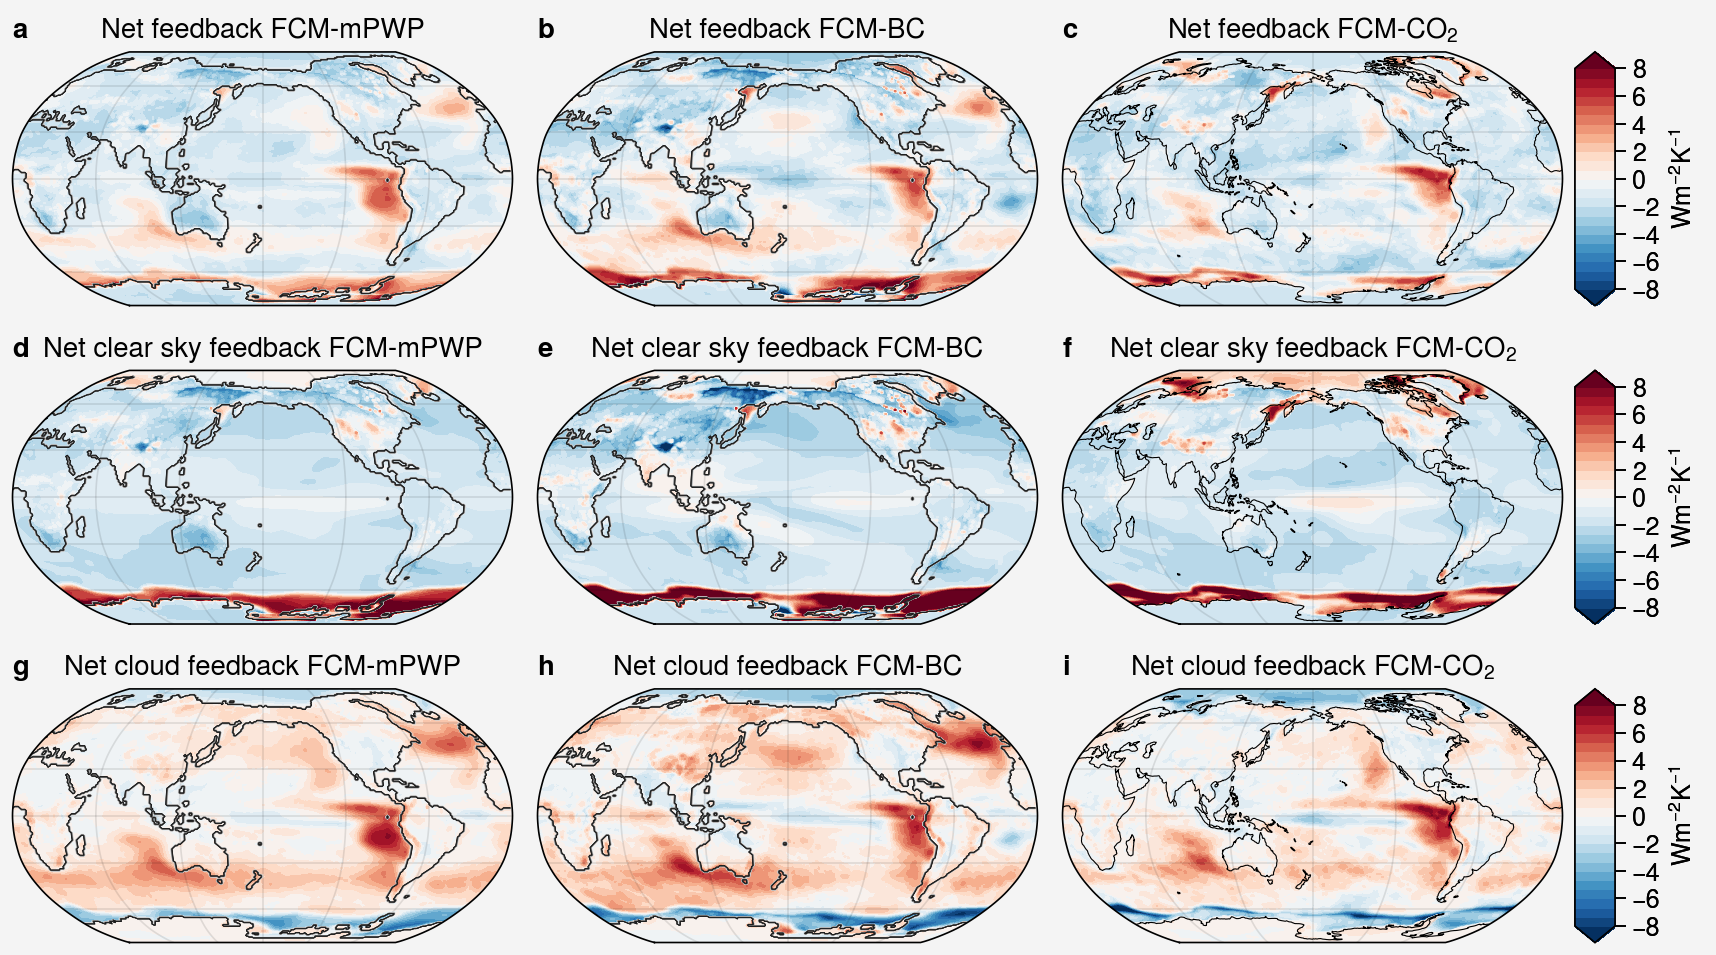

In [14]:
fig, axes = pplt.subplots(ncols=3,nrows=3, proj='robin', proj_kw={'lon_0': 180})


for i,ax in enumerate(axes[:3]):

    cp = ax.contourf((N_minus_F_LW[i] + N_minus_F_SW[i])/TS[i], levels=np.linspace(-8,8,25), extend='both')

    if i != 2:
        cf = ax.contour(mask.mask, cmap='black', linewidth=0.3)
        
axes[2].colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=2, length=1.0)
#ax.coastlines()
axes[0].set_title('Net feedback FCM-mPWP')
axes[1].set_title('Net feedback FCM-BC')
axes[2].set_title('Net feedback FCM-CO$_2$')

axes[2].coastlines(linewidth=0.4)

for i,ax in enumerate(axes[3:6]):

    cp = ax.contourf((N_minus_F_LW_CS[i] + N_minus_F_SW_CS[i])/TS[i], levels=np.linspace(-8,8,25), extend='both')

    if i != 2:
        cf = ax.contour(mask.mask, cmap='black', linewidth=0.3)

axes[5].colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=2, length=1.0)
#ax.coastlines()
axes[3].set_title('Net clear sky feedback FCM-mPWP')
axes[4].set_title('Net clear sky feedback FCM-BC')
axes[5].set_title('Net clear sky feedback FCM-CO$_2$')

axes[5].coastlines(linewidth=0.4)

for i,ax in enumerate(axes[6:]):
    
    cp = ax.contourf(((N_minus_F_LW[i] - N_minus_F_LW_CS[i]) + 
                     (N_minus_F_SW[i] - N_minus_F_SW_CS[i]))/TS[i], levels=np.linspace(-8,8,25), extend='both')

#    print((((N_minus_F_LW[i] - N_minus_F_LW_CS[i]) + 
#           (N_minus_F_SW[i] - N_minus_F_SW_CS[i]))/TS[i]).weighted(lat_weights(N_minus_F_LW[i])).mean(("lat","lon")))
    
    if i != 2:
        cf = ax.contour(mask.mask, cmap='black', linewidth=0.3)

axes[8].colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=2, length=1.0)
#ax.coastlines()
axes[6].set_title('Net cloud feedback FCM-mPWP')
axes[7].set_title('Net cloud feedback FCM-BC')
axes[8].set_title('Net cloud feedback FCM-CO$_2$')

axes[8].coastlines(linewidth=0.4)

fig.format(abc=True);
#plt.savefig('/data0/mdvorak/tdat/CMIP6/Pliocene/tos/CESM2/figures/Feedback_FCM_figure_revised.pdf');

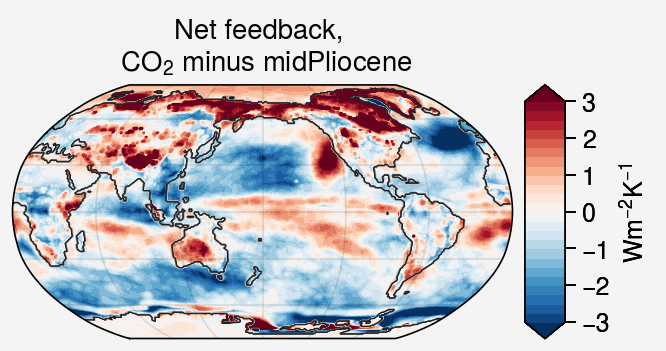

In [17]:
fig, axes = pplt.subplots(ncols=1,nrows=1, proj='robin', proj_kw={'lon_0': 180})

cp = axes.contourf(allsky[2] - allsky[1], levels=np.linspace(-3,3,25), extend='both')
axes.colorbar(cp, label='Wm$^{-2}$K$^{-1}$', ticks=1, length=1.0)
axes.set_title('Net feedback, \n CO$_2$ minus midPliocene')
axes.contour(mask.mask, cmap='black', linewidth=0.3);